In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    AdaBoostClassifier,
    GradientBoostingClassifier,
    RandomForestClassifier,
    BaggingClassifier,
)
from xgboost import XGBClassifier

# to create k folds of data and get cross validation score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# To be used for missing value imputation
from sklearn.impute import SimpleImputer

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

from sklearn import metrics
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    plot_confusion_matrix,
)

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

pd.set_option("display.max_columns", None)
pd.set_option("display.float_format", lambda x: "%.3f" % x)

In [2]:
train_data = pd.read_csv(r"C:\Users\Soneeka\Documents\Courses\GL - DSBA\Hackathons\2 - NBFC Loan Default\Train_set.csv")
test_data = pd.read_csv(r"C:\Users\Soneeka\Documents\Courses\GL - DSBA\Hackathons\2 - NBFC Loan Default\Test_set.csv")

In [3]:
train_data.shape

(93174, 23)

In [4]:
train_data.sample(n=20, random_state=1)

,ID,loan_amnt,loan_term,interest_rate,loan_grade,loan_subgrade,job_experience,home_ownership,annual_income,income_verification_status,loan_purpose,state_code,debt_to_income,delinq_2yrs,public_records,revolving_balance,total_acc,interest_receive,application_type,last_week_pay,total_current_balance,total_revolving_limit,default
55354,6049113,15000,3 years,12.120,B,B3,10+ years,MORTGAGE,78000.000,Not Verified,credit_card,TX,23.780,0.000,0.000,35809,26.000,2438.720,INDIVIDUAL,92.000,167969.000,57300.000,1
37647,66433740,12000,3 years,6.890,A,A3,<5 Years,RENT,70000.000,Verified,debt_consolidation,CA,14.080,0.000,0.000,2292,18.000,192.310,INDIVIDUAL,13.000,61657.000,13900.000,0
85499,55487146,8000,3 years,12.690,C,C2,<5 Years,RENT,41000.000,Not Verified,credit_card,AZ,28.220,0.000,0.000,5344,17.000,546.380,INDIVIDUAL,31.000,56179.000,11400.000,0
4187,59689149,20575,5 years,15.610,D,D1,<5 Years,MORTGAGE,78000.000,Source Verified,debt_consolidation,TX,18.000,0.000,0.000,15394,17.000,1542.680,INDIVIDUAL,26.000,32137.000,37100.000,0
19181,72529069,12000,5 years,16.990,D,D3,10+ years,OWN,99000.000,Not Verified,credit_card,CA,25.760,0.000,0.000,38342,20.000,0.000,INDIVIDUAL,NaN,410643.000,44000.000,0
21846,7107907,24000,5 years,22.470,E,E5,10+ years,RENT,105250.000,Verified,debt_consolidation,CA,10.650,0.000,0.000,21455,38.000,11613.170,INDIVIDUAL,135.000,79209.000,34600.000,0
14616,36956310,15000,5 years,14.310,C,C4,10+ years,RENT,80000.000,Verified,credit_card,MA,2.570,2.000,0.000,6043,10.000,2295.830,INDIVIDUAL,61.000,229731.000,10300.000,0
67075,66045939,4000,3 years,9.990,B,B3,<5 Years,MORTGAGE,70720.000,Source Verified,debt_consolidation,MD,13.490,3.000,0.000,6374,26.000,71.350,INDIVIDUAL,13.000,278326.000,7300.000,0
38410,26297747,2500,3 years,9.170,B,B1,10+ years,MORTGAGE,96000.000,Source Verified,other,NC,17.640,0.000,0.000,14990,26.000,259.320,INDIVIDUAL,74.000,116035.000,16000.000,0
36259,59793217,12000,5 years,9.990,B,B3,10+ years,RENT,105000.000,Not Verified,debt_consolidation,NJ,12.260,0.000,1.000,9367,26.000,479.830,INDIVIDUAL,22.000,22875.000,22900.000,0


In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93174 entries, 0 to 93173
Data columns (total 23 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          93174 non-null  int64  
 1   loan_amnt                   93174 non-null  int64  
 2   loan_term                   93174 non-null  object 
 3   interest_rate               93174 non-null  float64
 4   loan_grade                  93174 non-null  object 
 5   loan_subgrade               93174 non-null  object 
 6   job_experience              88472 non-null  object 
 7   home_ownership              93174 non-null  object 
 8   annual_income               93173 non-null  float64
 9   income_verification_status  93174 non-null  object 
 10  loan_purpose                93174 non-null  object 
 11  state_code                  93174 non-null  object 
 12  debt_to_income              93174 non-null  float64
 13  delinq_2yrs                 931

In [6]:
cat_cols = train_data.select_dtypes(['object']).columns

In [7]:
for col in cat_cols:
    train_data[col] = train_data[col].astype('category')

In [8]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93174 entries, 0 to 93173
Data columns (total 23 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   ID                          93174 non-null  int64   
 1   loan_amnt                   93174 non-null  int64   
 2   loan_term                   93174 non-null  category
 3   interest_rate               93174 non-null  float64 
 4   loan_grade                  93174 non-null  category
 5   loan_subgrade               93174 non-null  category
 6   job_experience              88472 non-null  category
 7   home_ownership              93174 non-null  category
 8   annual_income               93173 non-null  float64 
 9   income_verification_status  93174 non-null  category
 10  loan_purpose                93174 non-null  category
 11  state_code                  93174 non-null  category
 12  debt_to_income              93174 non-null  float64 
 13  delinq_2yrs     

In [9]:
pd.set_option('display.float_format', lambda x: '%.1f' %x)
train_data.describe()

,ID,loan_amnt,interest_rate,annual_income,debt_to_income,delinq_2yrs,public_records,revolving_balance,total_acc,interest_receive,last_week_pay,total_current_balance,total_revolving_limit,default
count,93174.0,93174.0,93174.0,93173.0,93174.0,93172.0,93172.0,93174.0,93172.0,93174.0,91250.0,85788.0,85788.0,93174.0
mean,35050211.4,14733.9,13.2,75028.3,18.1,0.3,0.2,16854.5,25.2,1747.3,58.2,139252.9,32085.9,0.2
std,24149262.1,8428.2,4.4,69454.8,8.6,0.9,0.6,23689.1,11.9,2088.2,44.3,157686.8,47052.5,0.4
min,70735.0,500.0,5.3,1200.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
25%,10859832.5,8000.0,10.0,45000.0,11.9,0.0,0.0,6433.0,17.0,439.9,22.0,29642.0,14000.0,0.0
50%,37107507.0,13000.0,13.0,64000.0,17.6,0.0,0.0,11856.0,24.0,1070.8,48.0,79363.5,23700.0,0.0
75%,58598949.5,20000.0,16.2,90000.0,23.9,0.0,0.0,20745.0,32.0,2219.6,83.0,207160.0,39700.0,0.0
max,73519746.0,35000.0,29.0,9500000.0,672.5,22.0,49.0,2560703.0,119.0,23172.3,291.0,8000078.0,9999999.0,1.0


In [10]:
train_data.describe(include=['category']).T

,count,unique,top,freq
loan_term,93174,2,3 years,65211
loan_grade,93174,7,B,26865
loan_subgrade,93174,35,B4,5879
job_experience,88472,3,<5 Years,40610
home_ownership,93174,5,MORTGAGE,46445
income_verification_status,93174,3,Source Verified,34487
loan_purpose,93174,4,debt_consolidation,55241
state_code,93174,50,CA,13744
application_type,93174,2,INDIVIDUAL,93118


In [11]:
train_data.duplicated().sum()

0

In [12]:
train_data.isnull().sum()

ID                               0
loan_amnt                        0
loan_term                        0
interest_rate                    0
loan_grade                       0
loan_subgrade                    0
job_experience                4702
home_ownership                   0
annual_income                    1
income_verification_status       0
loan_purpose                     0
state_code                       0
debt_to_income                   0
delinq_2yrs                      2
public_records                   2
revolving_balance                0
total_acc                        2
interest_receive                 0
application_type                 0
last_week_pay                 1924
total_current_balance         7386
total_revolving_limit         7386
default                          0
dtype: int64

In [13]:
test_data.isnull().sum()

ID                               0
loan_amnt                        0
loan_term                        0
interest_rate                    0
loan_grade                       0
loan_subgrade                    0
job_experience                2089
home_ownership                   0
annual_income                    0
income_verification_status       0
loan_purpose                     0
state_code                       0
debt_to_income                   0
delinq_2yrs                      1
public_records                   1
revolving_balance                0
total_acc                        1
interest_receive                 0
application_type                 0
last_week_pay                  806
total_current_balance         3230
total_revolving_limit         3230
dtype: int64

In [14]:
df = train_data.copy()

In [15]:
print("Values of class distribution in train data:")
print(df["default"].value_counts(normalize=True))

print("Percentage of class distribution in train data:")
print(df["default"].value_counts(normalize=True))

Values of class distribution in train data:
0   0.8
1   0.2
Name: default, dtype: float64
Percentage of class distribution in train data:
0   0.8
1   0.2
Name: default, dtype: float64


## Outliers

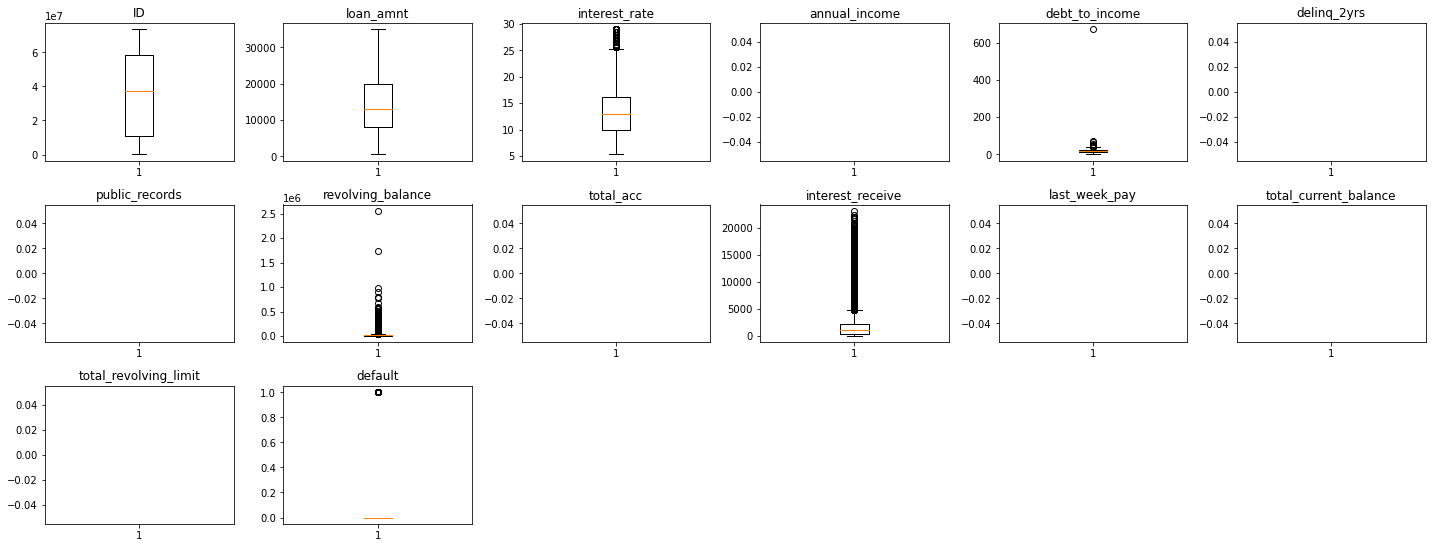

In [16]:
num_cols = df.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(20,10))
for i, variable in enumerate(num_cols):
  plt.subplot(4,6,i+1)
  plt.boxplot(df[variable],whis=1.5)
  plt.tight_layout()
  plt.title(variable)
plt.show()

In [17]:
q1 = df[num_cols].quantile(0.25)
q3 = df[num_cols].quantile(0.75)
iqr = q3 - q1
lw = q1 - 1.5 * iqr
uw = q3 - 1.5 * iqr
100 - ((df[num_cols]<lw)|(df[num_cols]>uw)).sum()/df.shape[0]*100

ID                       0.0
loan_amnt                1.7
interest_rate            5.3
annual_income            2.0
debt_to_income           6.4
delinq_2yrs             80.8
public_records          84.7
revolving_balance        0.0
total_acc                5.7
interest_receive         0.0
last_week_pay            2.1
total_current_balance    7.9
total_revolving_limit    8.1
default                 76.2
dtype: float64

In [18]:
mode = df['job_experience'].mode()

df['job_experience'] = df['job_experience'].isnull().fillna(mode)

## Preprocessing

In [19]:
X = df.drop(["default"], axis=1)
y = df["default"]

In [20]:
X_temp, X_test, y_temp, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1, stratify=y
)

X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.25, random_state=1, stratify=y_temp
)

In [21]:
print(X_train.shape, X_val.shape, X_test.shape)

(55904, 22) (18635, 22) (18635, 22)


In [22]:
num_imputer = SimpleImputer(strategy="mean")
cols_to_impute = [
    'annual_income',
    'delinq_2yrs',
    'public_records',
    'total_acc',
    'last_week_pay',
    'total_current_balance',
    'total_revolving_limit',
]

# Fit and transform training data
X_train[cols_to_impute] = num_imputer.fit_transform(X_train[cols_to_impute])
# Transform validation and testing data
X_val[cols_to_impute] = num_imputer.transform(X_val[cols_to_impute])
X_test[cols_to_impute] = num_imputer.transform(X_test[cols_to_impute])

In [23]:
print(X_train.isna().sum())
print("-" * 30)
print(X_val.isna().sum())
print("-" * 30)
print(X_test.isna().sum())

ID                            0
loan_amnt                     0
loan_term                     0
interest_rate                 0
loan_grade                    0
loan_subgrade                 0
job_experience                0
home_ownership                0
annual_income                 0
income_verification_status    0
loan_purpose                  0
state_code                    0
debt_to_income                0
delinq_2yrs                   0
public_records                0
revolving_balance             0
total_acc                     0
interest_receive              0
application_type              0
last_week_pay                 0
total_current_balance         0
total_revolving_limit         0
dtype: int64
------------------------------
ID                            0
loan_amnt                     0
loan_term                     0
interest_rate                 0
loan_grade                    0
loan_subgrade                 0
job_experience                0
home_ownership              

In [24]:
X_train = pd.get_dummies(data=X_train, drop_first=True)
X_val = pd.get_dummies(data=X_val, drop_first=True)
X_test = pd.get_dummies(data=X_test, drop_first=True)

## Model Building

In [25]:
def model_performance_classification_sklearn(model, predictors, target):
    pred = model.predict(predictors)
    acc = accuracy_score(target, pred) # to compute Accuracy
    recall = recall_score(target, pred) # to compute Recall
    precision = precision_score(target, pred) # to compute Precision
    f1 = f1_score(target, pred) # to compute F1-score
    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1
        },
        index=[0]
    )
    return df_perf

In [26]:
scorer = metrics.make_scorer(metrics.accuracy_score)

In [27]:
models = []

models.append(("DT", DecisionTreeClassifier(random_state=1)))
models.append(("Bagging", BaggingClassifier(random_state=1)))
models.append(("RF", RandomForestClassifier(random_state=1)))
models.append(("GBM", GradientBoostingClassifier(random_state=1)))
models.append(("AB", AdaBoostClassifier(random_state=1)))
models.append(("XGB", XGBClassifier(random_state=1, eval_metric="logloss")))

results = []
names = []
score = []

print("\n" "Cross-Validation Performance:" "\n")

for name, model in models:
    kfold = StratifiedKFold(
        n_splits=5,
        shuffle=True,
        random_state=1
    )
    cv_result = cross_val_score(
        estimator=model,
        X=X_train,
        y=y_train,
        scoring=scorer,
        cv=kfold
    )
    results.append(cv_result)
    names.append(name)
    print("{}: {}".format(name, cv_result.mean()))

print("\n" "Validation Performance:" "\n")

for name, model in models:
    model.fit(X_train, y_train)
    scores = accuracy_score(y_val, model.predict(X_val))
    score.append(scores)
    print("{}: {}".format(name, scores))


Cross-Validation Performance:

DT: 0.8719770137783254
Bagging: 0.9006689984398847
RF: 0.8697946346816627
GBM: 0.891295791688526
AB: 0.8624785658138752
XGB: 0.9078062532289076

Validation Performance:

DT: 0.8697075395760665
Bagging: 0.8955728467936678
RF: 0.8689562650925677
GBM: 0.8873624899382881
AB: 0.854950362221626
XGB: 0.9025489669975851


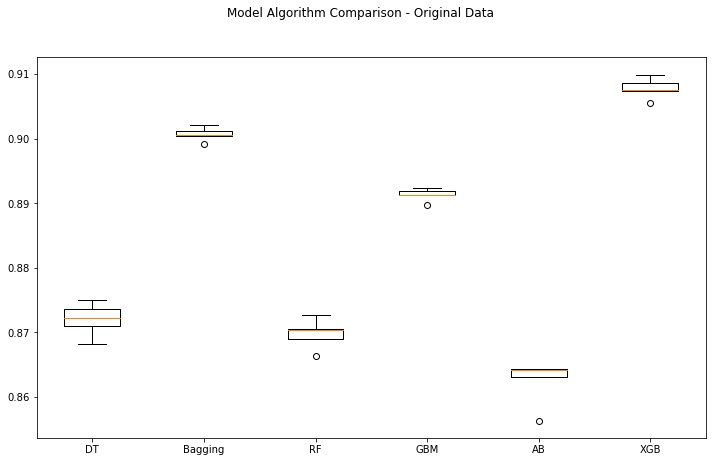

In [28]:
fig = plt.figure(figsize=(12,7))

fig.suptitle("Model Algorithm Comparison - Original Data")
ax = fig.add_subplot(111)

plt.boxplot(results)
ax.set_xticklabels(names)

plt.show()

In [29]:
print("Before UnderSampling, counts of label 'Predicted': {}".format(sum(y_train == 1)))
print("Before UnderSampling, counts of label 'Not Predicted': {} \n".format(sum(y_train == 0)))

rus = RandomUnderSampler(random_state=1, sampling_strategy=1)
X_train_under, y_train_under = rus.fit_resample(X_train, y_train)

print("After UnderSampling, counts of label 'Predicted': {}".format(sum(y_train_under == 1)))
print("After UnderSampling, counts of label 'Not Predicted': {} \n".format(sum(y_train_under == 0)))

print("After UnderSampling, the shape of train_X: {}".format(X_train_under.shape))
print("After UnderSampling, the shape of train_y: {} \n".format(y_train_under.shape))

Before UnderSampling, counts of label 'Predicted': 13277
Before UnderSampling, counts of label 'Not Predicted': 42627 

After UnderSampling, counts of label 'Predicted': 13277
After UnderSampling, counts of label 'Not Predicted': 13277 

After UnderSampling, the shape of train_X: (26554, 114)
After UnderSampling, the shape of train_y: (26554,) 



In [30]:
models_u = []

# Appending models into the list
models_u.append(("DT", DecisionTreeClassifier(random_state=1)))
models_u.append(("Bagging", BaggingClassifier(random_state=1)))
models_u.append(("RF", RandomForestClassifier(random_state=1)))
models_u.append(("GBM", GradientBoostingClassifier(random_state=1)))
models_u.append(("AB", AdaBoostClassifier(random_state=1)))
models_u.append(("XGB", XGBClassifier(random_state=1, eval_metric="logloss")))

# Creating empty list to store CV scores and names
results_u = []
names_u = []
score_u = []

# Creating a loop for all the models and append it to the empty lists
print("\n" "Cross-Validation Performance:" "\n")

for name, model in models_u:
    kfold = StratifiedKFold(
        n_splits=5,
        shuffle=True,
        random_state=1
    )
    cv_result = cross_val_score(
        estimator=model,
        X=X_train_under,
        y=y_train_under,
        scoring=scorer,
        cv=kfold
    )
    results_u.append(cv_result)
    names_u.append(name)
    print("{}: {}".format(name, cv_result.mean()))

print("\n" "Validation Performance:" "\n")

for name, model in models_u:
    model.fit(X_train_under, y_train_under)
    scores = accuracy_score(y_val, model.predict(X_val))
    score_u.append(scores)
    print("{}: {}".format(name, scores))


Cross-Validation Performance:

DT: 0.8600585786313522
Bagging: 0.9059274554002796
RF: 0.8475180850886535
GBM: 0.8931610298917677
AB: 0.8358812910418308
XGB: 0.9090155066714749

Validation Performance:

DT: 0.8536088006439495
Bagging: 0.8962167963509525
RF: 0.8534478132546284
GBM: 0.8962704588140595
AB: 0.8357392004292997
XGB: 0.9016367051247652


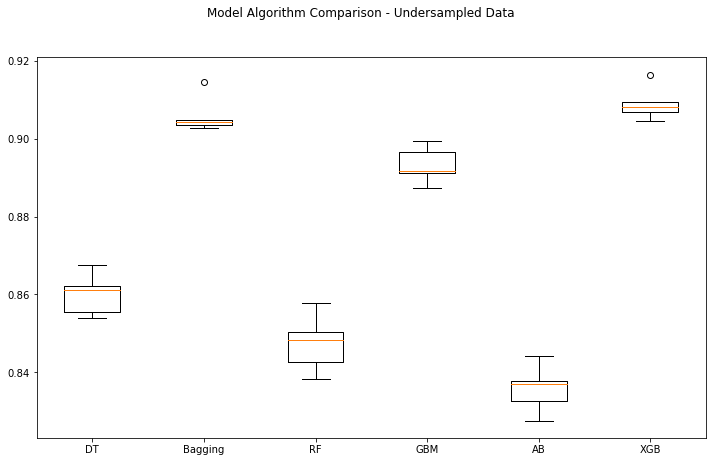

In [31]:
fig = plt.figure(figsize=(12,7))

fig.suptitle("Model Algorithm Comparison - Undersampled Data")
ax = fig.add_subplot(111)

plt.boxplot(results_u)
ax.set_xticklabels(names_u)

plt.show()

**Bagging Original Data**

In [32]:
Model = BaggingClassifier(random_state=1)

# Setting hyperparameters
param_grid = {
    'max_samples': [0.8,0.9,1],
    'max_features': [0.7,0.8,0.9],
    'n_estimators' : [30,50,70]
}

scorer = metrics.make_scorer(metrics.accuracy_score)

# Using GridSearchCV
grid_cv = GridSearchCV(
    estimator=Model,
    param_grid=param_grid,
    scoring=scorer,
    cv=5
)

# Fitting parameters
grid_cv.fit(X_train,y_train)

print("Best parameters are {} with CV score={}:" .format(grid_cv.best_params_,grid_cv.best_score_))

Best parameters are {'max_features': 0.9, 'max_samples': 0.9, 'n_estimators': 70} with CV score=0.9087542948769947:


In [33]:
# Creating new pipeline with best parameters
Bg = BaggingClassifier(
    random_state=1,
    n_estimators=70,
    max_samples=0.9,
    max_features=0.9
)

# Fitting model on training data
Bg.fit(X_train,y_train)

BaggingClassifier(max_features=0.9, max_samples=0.9, n_estimators=70,
                  random_state=1)

In [34]:
# Calculating metrics on training set
Bg_train = model_performance_classification_sklearn(Bg, X_train, y_train)
print("Training performance:")
Bg_train

Training performance:


,Accuracy,Recall,Precision,F1
0,1.0,1.0,1.0,1.0


In [35]:
# Calculating metrics on validation set
Bg_val = model_performance_classification_sklearn(Bg, X_val, y_val)
print("Validation performance:")
Bg_val

Validation performance:


,Accuracy,Recall,Precision,F1
0,0.9,0.8,0.8,0.8


**Bagging Undersampled Data**

In [36]:
Model = BaggingClassifier(random_state=1)

# Setting hyperparameters
param_grid = {
    'max_samples': [0.8,0.9,1],
    'max_features': [0.7,0.8,0.9],
    'n_estimators' : [30,50,70]
}

scorer = metrics.make_scorer(metrics.accuracy_score)

# Using GridSearchCV
grid_cv = GridSearchCV(
    estimator=Model,
    param_grid=param_grid,
    scoring=scorer,
    cv=5
)

# Fitting parameters
grid_cv.fit(X_train_under,y_train_under)

print("Best parameters are {} with CV score={}:" .format(grid_cv.best_params_,grid_cv.best_score_))

Best parameters are {'max_features': 0.9, 'max_samples': 0.9, 'n_estimators': 70} with CV score=0.915267236638168:


In [37]:
# Creating new pipeline with best parameters
Bg_under = BaggingClassifier(
    random_state=1,
    n_estimators=70,
    max_samples=0.9,
    max_features=0.9
)

# Fitting model on training data
Bg_under.fit(X_train_under,y_train_under)

BaggingClassifier(max_features=0.9, max_samples=0.9, n_estimators=70,
                  random_state=1)

In [38]:
# Calculating metrics on training set
Bg_under_train = model_performance_classification_sklearn(Bg_under,X_train_under,y_train_under)
print("Training performance:")
Bg_under_train

Training performance:


,Accuracy,Recall,Precision,F1
0,1.0,1.0,1.0,1.0


In [39]:
# Calculating metrics on validation set
Bg_under_val = model_performance_classification_sklearn(Bg_under, X_val, y_val)
print("Validation performance:")
Bg_under_val

Validation performance:


,Accuracy,Recall,Precision,F1
0,0.9,0.9,0.7,0.8


**Gradient Boosting Original Data**

In [40]:
Model = GradientBoostingClassifier(random_state=1)

# Setting hyperparameters
param_grid = {
    'n_estimators': np.arange(100,150,25),
    'learning_rate': [0.2, 0.05, 1],
    'subsample':[0.5,0.7],
    'max_features':[0.5,0.7]
}

scorer = metrics.make_scorer(metrics.accuracy_score)

# Using GridSearchCV
grid_cv = GridSearchCV(
    estimator=Model,
    param_grid=param_grid,
    scoring=scorer,
    cv=5
)

# Fitting parameters
grid_cv.fit(X_train,y_train)

print("Best parameters are {} with CV score={}:" .format(grid_cv.best_params_,grid_cv.best_score_))

Best parameters are {'learning_rate': 0.2, 'max_features': 0.7, 'n_estimators': 125, 'subsample': 0.7} with CV score=0.8998640870925456:


In [41]:
# Creating new pipeline with best parameters
GB = GradientBoostingClassifier(
    random_state=1,
    subsample=0.7,
    n_estimators=125,
    max_features=0.7,
    learning_rate=0.2
)

# Fitting model on training data
GB.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=0.2, max_features=0.7,
                           n_estimators=125, random_state=1, subsample=0.7)

In [42]:
# Calculating metrics on training set
GB_train = model_performance_classification_sklearn(GB, X_train, y_train)
print("Training performance:")
GB_train

Training performance:


,Accuracy,Recall,Precision,F1
0,0.9,0.8,0.8,0.8


In [43]:
# Calculating metrics on validation set
GB_val = model_performance_classification_sklearn(GB, X_val, y_val)
print("Validation performance:")
GB_val

Validation performance:


,Accuracy,Recall,Precision,F1
0,0.9,0.8,0.8,0.8


**Gradient Boosting Undersampled Data**

In [44]:
Model = GradientBoostingClassifier(random_state=1)

# Setting hyperparameters
param_grid = {
    'n_estimators': np.arange(100,150,25),
    'learning_rate': [0.2, 0.05, 1],
    'subsample':[0.5,0.7],
    'max_features':[0.5,0.7]
}

scorer = metrics.make_scorer(metrics.accuracy_score)

# Using GridSearchCV
grid_cv = GridSearchCV(
    estimator=Model,
    param_grid=param_grid,
    scoring=scorer,
    cv=5
)
# Fitting parameters
grid_cv.fit(X_train_under,y_train_under)

print("Best parameters are {} with CV score={}:" .format(grid_cv.best_params_,grid_cv.best_score_))

Best parameters are {'learning_rate': 0.2, 'max_features': 0.7, 'n_estimators': 125, 'subsample': 0.7} with CV score=0.8957975789153805:


In [45]:
# Creating new pipeline with best parameters
GB_under = GradientBoostingClassifier(
    random_state=1,
    subsample=0.7,
    n_estimators=125,
    max_features=0.7,
    learning_rate=0.2
)

# Fitting model on training data
GB_under.fit(X_train_under, y_train_under)

GradientBoostingClassifier(learning_rate=0.2, max_features=0.7,
                           n_estimators=125, random_state=1, subsample=0.7)

In [46]:
# Calculating metrics on training set
GB_under_train = model_performance_classification_sklearn(GB_under, X_train_under, y_train_under)
print("Training performance:")
GB_under_train

Training performance:


,Accuracy,Recall,Precision,F1
0,0.9,0.9,0.9,0.9


In [47]:
# Calculating metrics on validation set
GB_under_val = model_performance_classification_sklearn(GB_under, X_val, y_val)
print("Validation performance:")
GB_under_val

Validation performance:


,Accuracy,Recall,Precision,F1
0,0.9,0.9,0.7,0.8


**XGBoost Original Data**

In [48]:
Model = XGBClassifier(random_state=1, eval_metric="logloss")

# Setting hyperparameters
param_grid = {
    'n_estimators': [150, 200, 250],
    'scale_pos_weight': [5,10],
    'learning_rate': [0.1,0.2],
    'gamma': [0,3,5],
    'subsample': [0.8,0.9]
}

scorer = metrics.make_scorer(metrics.accuracy_score)

# Using GridSearchCV
grid_cv = GridSearchCV(
    estimator=Model,
    param_grid=param_grid,
    scoring=scorer,
    cv=5
)

# Fitting parameters
grid_cv.fit(X_train,y_train)

print("Best parameters are {} with CV score={}:" .format(grid_cv.best_params_,grid_cv.best_score_))

Best parameters are {'gamma': 0, 'learning_rate': 0.2, 'n_estimators': 250, 'scale_pos_weight': 5, 'subsample': 0.8} with CV score=0.9091835817822178:


In [49]:
# Creating new pipeline with best parameters
XGB = XGBClassifier(
    random_state=1,
    eval_metric="logloss",
    subsample=0.8,
    scale_pos_weight=5,
    n_estimators=250,
    learning_rate=0.2,
    gamma=0
)

# Fitting model on training data
XGB.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric='logloss', gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.2, max_bin=256,
              max_cat_to_onehot=4, max_delta_step=0, max_depth=6, max_leaves=0,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=250, n_jobs=0, num_parallel_tree=1, predictor='auto',
              random_state=1, reg_alpha=0, reg_lambda=1, ...)

In [50]:
# Calculating metrics on training set
XGB_train = model_performance_classification_sklearn(XGB, X_train, y_train)
print("Training performance:")
XGB_train

Training performance:


,Accuracy,Recall,Precision,F1
0,0.9,1.0,0.8,0.9


In [51]:
# Calculating metrics on validation set
XGB_val = model_performance_classification_sklearn(XGB, X_val, y_val)
print("Validation performance:")
XGB_val

Validation performance:


,Accuracy,Recall,Precision,F1
0,0.9,0.9,0.7,0.8


**XGBoost Undersampled Data**

In [52]:
Model = XGBClassifier(random_state=1, eval_metric="logloss")

# Setting hyperparameters
param_grid = {
    'n_estimators': [150, 200, 250],
    'scale_pos_weight': [5,10],
    'learning_rate': [0.1,0.2],
    'gamma': [0,3,5],
    'subsample': [0.8,0.9]
}

scorer = metrics.make_scorer(metrics.accuracy_score)

# Using GridSearchCV
grid_cv = GridSearchCV(
    estimator=Model,
    param_grid=param_grid,
    scoring=scorer,
    cv=5
)

# Fitting parameters
grid_cv.fit(X_train_under,y_train_under)

print("Best parameters are {} with CV score={}:" .format(grid_cv.best_params_,grid_cv.best_score_))

Best parameters are {'gamma': 0, 'learning_rate': 0.2, 'n_estimators': 250, 'scale_pos_weight': 5, 'subsample': 0.9} with CV score=0.9078483451713939:


In [53]:
# Creating new pipeline with best parameters
XGB_under = XGBClassifier(
    random_state=1,
    eval_metric="logloss",
    subsample=0.9,
    scale_pos_weight=5,
    n_estimators=250,
    learning_rate=0.2,
    gamma=0
)

# Fitting model on training data
XGB_under.fit(X_train_under, y_train_under)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric='logloss', gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.2, max_bin=256,
              max_cat_to_onehot=4, max_delta_step=0, max_depth=6, max_leaves=0,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=250, n_jobs=0, num_parallel_tree=1, predictor='auto',
              random_state=1, reg_alpha=0, reg_lambda=1, ...)

In [54]:
# Calculating metrics on training set
XGB_under_train = model_performance_classification_sklearn(XGB_under, X_train_under, y_train_under)
print("Training performance:")
XGB_under_train

Training performance:


,Accuracy,Recall,Precision,F1
0,1.0,1.0,0.9,1.0


In [55]:
# Calculating metrics on validation set
XGB_under_val = model_performance_classification_sklearn(XGB_under, X_val, y_val)
print("Validation performance:")
XGB_under_val

Validation performance:


,Accuracy,Recall,Precision,F1
0,0.9,0.9,0.7,0.8


## Model Comparison

In [56]:
models_train_comp_df = pd.concat(
    [
        Bg_train.T,
        Bg_under_train.T,
        GB_train.T,
        GB_under_train.T,
        XGB_train.T,
        XGB_under_train.T,
    ],
    axis=1
)

models_train_comp_df.columns = [
    "Bagging",
    "Bagging_Under",
    "GBoost",
    "GBoost_Under",
    "XGBoost",
    "XGBoost_Under",
]

print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Bagging,Bagging_Under,GBoost,GBoost_Under,XGBoost,XGBoost_Under
Accuracy,1.0,1.0,0.9,0.9,0.9,1.0
Recall,1.0,1.0,0.8,0.9,1.0,1.0
Precision,1.0,1.0,0.8,0.9,0.8,0.9
F1,1.0,1.0,0.8,0.9,0.9,1.0


In [57]:
models_val_comp_df = pd.concat(
    [
        Bg_val.T,
        Bg_under_val.T,
        GB_val.T,
        GB_under_val.T,
        XGB_val.T,
        XGB_under_val.T,
    ],
    axis=1
)

models_val_comp_df.columns = [
    "Bagging",
    "Bagging_Under",
    "GBoost",
    "GBoost_Under",
    "XGBoost",
    "XGBoost_Under",
]
    
print("Validation performance comparison:")
models_val_comp_df

Validation performance comparison:


,Bagging,Bagging_Under,GBoost,GBoost_Under,XGBoost,XGBoost_Under
Accuracy,0.9,0.9,0.9,0.9,0.9,0.9
Recall,0.8,0.9,0.8,0.9,0.9,0.9
Precision,0.8,0.7,0.8,0.7,0.7,0.7
F1,0.8,0.8,0.8,0.8,0.8,0.8


In [58]:
GB_under_test = model_performance_classification_sklearn(GB_under, X_test, y_test)
print("Test performance:")
GB_under_test

Test performance:


,Accuracy,Recall,Precision,F1
0,0.9,0.9,0.7,0.8


In [ ]:
feature_names = X_train.columns
importances = GB_under.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 30))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

## Final Model Pipeline

In [71]:
X1 = train_data.drop("default", axis=1)
Y1 = train_data["default"]

In [60]:
#rus = RandomUnderSampler(random_state=1, sampling_strategy=1)
#X_under1, y_under1 = rus.fit_resample(X1, Y1)

In [72]:
num_features = X1.select_dtypes(['number']).columns
num_transformer = Pipeline(
    steps=[
        ("imputer", SimpleImputer(strategy="mean")),
        ("scaler", StandardScaler())
    ]
)

cat_features = X1.select_dtypes(['category']).columns
cat_transformer = Pipeline(
    steps=[
        ("imputer", SimpleImputer(strategy="most_frequent",fill_value='misisng')),
        ("encoder", OneHotEncoder(drop='first',handle_unknown='ignore'))
    ]
)

preprocessor = ColumnTransformer(
    transformers=[
        ("num", num_transformer, num_features),
        ("cat", cat_transformer, cat_features)
    ],
    remainder="passthrough"
)

In [74]:
model = Pipeline(
    steps=[
        ("pre",
         preprocessor),
        ("classifier",
         XGBClassifier(
             random_state=1,
             eval_metric="logloss",
             subsample=0.8,
             scale_pos_weight=5,
             n_estimators=250,
             learning_rate=0.2,
             gamma=0)
        ),
    ]
)

model.fit(X1, Y1)

Pipeline(steps=[('pre',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['ID', 'loan_amnt', 'interest_rate', 'annual_income', 'debt_to_income',
       'delinq_2yrs', 'public_records', 'revolving_balance', 'total_acc',
       'interest_receive', 'last_week_pay', 'total_current_bala...
                               enable_categorical=False, eval_metric='logloss',
                               gamma=0, gpu_id=-1, grow_policy='depthwise',
                               importance_type=None, interaction_constraints='',
                               learning_rate=0.2, max_bin=256,
                               max_cat_to_onehot=4, max_delta_step=0,
                               max_depth=6, max_leaves=0, min_child_weight=1,
                               missing=nan, monotone_constraints='()',
                               n_estimators=250, n_jobs=0, num_parallel_tree=1,
                               predictor='auto', random_state=1, reg_alpha=0,
                               reg_lambda=1, ...))])

In [75]:
prediction = model.predict(test_data)

In [76]:
print(prediction)

[1 0 1 ... 0 0 0]


In [77]:
prediction.shape

(39933,)

In [78]:
id_col = test_data[['ID']].copy()
id_col

,ID
0,4855329
1,66862420
2,3637416
3,53682249
4,53937165
...,...
39928,57779318
39929,59742362
39930,72657145
39931,15220189


In [79]:
predictions = pd.DataFrame(prediction, columns=['default'])
predictions

,default
0,1
1,0
2,1
3,0
4,0
...,...
39928,0
39929,0
39930,0
39931,0


In [80]:
id_col.to_csv('id_e.csv')

In [81]:
predictions.to_csv('predictions_e.csv')